In [5]:
#import requests
#from bs4 import BeautifulSoup as bs
import pandas as pd
from datetime import datetime, timedelta

In [4]:
!pip install pandas

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
      --------------------------------------- 0.2/10.7 MB 4.8 MB/s eta 0:00:03
     - -------------------------------------- 0.5/10.7 MB 5.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.7/10.7 MB 5.9 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/10.7 MB 5.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.2/10.7 MB 5.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.5/10.7 MB 5.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.8/10.7 MB 5.6 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/10.7 MB 5.8 MB/s eta 0:00:02
     -------- ------------------------------- 2.4/10.7 MB 5.8 MB/s eta 0:00:02
     ---------- ----------------------------- 2.7/10.7 MB 5.9 MB/s eta 0:00:02
     ----------- ---------------------------- 3.0/10.7 MB 5.9 MB/s eta 0:00:02
     ------------ --------------------------- 3.2/10.7 MB 5


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\희준\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install selenium

     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
      --------------------------------------- 0.1/6.5 MB 2.6 MB/s eta 0:00:03
     - -------------------------------------- 0.3/6.5 MB 4.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.6/6.5 MB 4.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/6.5 MB 4.5 MB/s eta 0:00:02
     ------ --------------------------------- 1.0/6.5 MB 4.9 MB/s eta 0:00:02
     ------- -------------------------------- 1.2/6.5 MB 4.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.4/6.5 MB 4.7 MB/s eta 0:00:02
     --------- ------------------------------ 1.6/6.5 MB 4.6 MB/s eta 0:00:02
     ---------- ----------------------------- 1.8/6.5 MB 4.8 MB/s eta 0:00:02
     ----------- ---------------------------- 1.9/6.5 MB 4.4 MB/s eta 0:00:02
     ------------- -------------------------- 2.2/6.5 MB 4.5 MB/s eta 0:00:01
     -------------- ------------------------- 2.4/6.5 MB 4.4 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\희준\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
page = requests.get("https://heestogram.github.io/categories/#page-title")
soup = bs(page.text, "html.parser")
soup = soup.find(class_="archive")

In [3]:
dict_ = {}
title_list = []
date_list = []
category_list = []
summary_list = []
num_of_posts = len(soup.find_all(class_='archive__item-title no_toc'))

for i in range(num_of_posts):
    step1 = soup.find_all(class_='archive__item-title no_toc')[i]
    step2 = step1.find('a').text[:-1]
    title_list.append(step2)
    
    step1 = soup.find_all(class_='archive__item-excerpt')[2*i].text
    
    date_list.append(datetime.strptime(step1.split()[0], '%m/%d/%Y').strftime("%Y-%m-%d"))
    category_list.append(step1.split()[1])
    
    step1 = soup.find_all(itemprop='description')[i].text[:-1]
    summary_list.append(step1)
    
dict_['title'] = title_list
dict_['date'] = date_list
dict_['category'] = category_list
dict_['summary'] = summary_list

In [4]:
df_ = pd.DataFrame(dict_)

<AxesSubplot:>

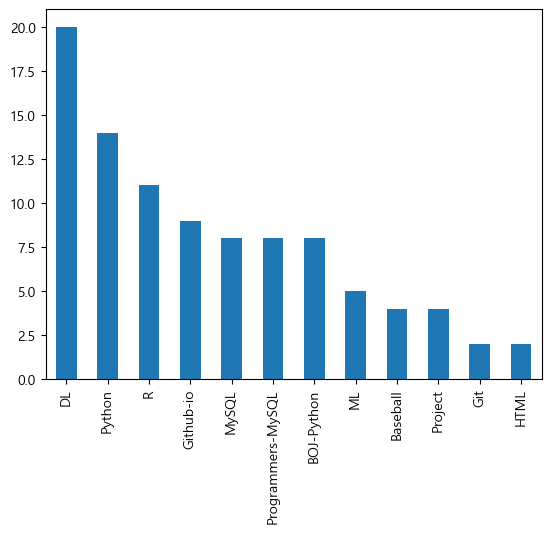

In [8]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

df_['category'].value_counts().plot.bar()

In [8]:
df_.to_csv('github_blog_crawling.csv', encoding='euc-kr')

In [25]:
page = requests.get("https://github.com/heestogram")
soup = bs(page.text, "html.parser")
soup = soup.find_all(class_="ContributionCalendar-day")

In [37]:
text_list = []
date_list = []
dict_ = {}
length = len(soup)
for i in range(length):
    text_list.append(soup[i].text)
    try:
        date_list.append(soup[i]['data-date'])
    except KeyError:
        date_list.append('no date')

In [38]:
dict_['date']=date_list
dict_['contribution']=text_list
df_commit = pd.DataFrame(dict_)

,date,contribution
0,2022-03-27,"No contributions on Sunday, March 27, 2022"
1,2022-03-28,"No contributions on Monday, March 28, 2022"
2,2022-03-29,"No contributions on Tuesday, March 29, 2022"
3,2022-03-30,"No contributions on Wednesday, March 30, 2022"
4,2022-03-31,"No contributions on Thursday, March 31, 2022"
...,...,...
371,no date,
372,no date,
373,no date,
374,no date,


In [45]:
df_commit = df_commit[df_commit.date != 'no date']

,date,contribution
0,2022-03-27,"No contributions on Sunday, March 27, 2022"
1,2022-03-28,"No contributions on Monday, March 28, 2022"
2,2022-03-29,"No contributions on Tuesday, March 29, 2022"
3,2022-03-30,"No contributions on Wednesday, March 30, 2022"
4,2022-03-31,"No contributions on Thursday, March 31, 2022"
...,...,...
366,2023-03-28,"No contributions on Tuesday, March 28, 2023"
367,2023-03-29,"No contributions on Wednesday, March 29, 2023"
368,2023-03-30,"1 contribution on Thursday, March 30, 2023"
369,2023-03-31,"11 contributions on Friday, March 31, 2023"


In [47]:
df_commit['date'] = pd.to_datetime(df_commit['date'])

C:\Users\희준\AppData\Local\Temp\ipykernel_25104\184324504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commit['date'] = pd.to_datetime(df_commit['date'])


In [66]:
df_commit.to_csv('github_commit_crawling.csv')

In [6]:
## 에브리타임 크롤링

from selenium import webdriver
from selenium.webdriver.common.by import By

In [8]:
# 에브리타임 로그인 하는 과정

driver = webdriver.Chrome(executable_path = "D:/heejun/dev/chromedriver.exe")
driver.implicitly_wait(1)
driver.get('https://everytime.kr/login')
driver.find_element(By.NAME,'userid').send_keys('anthjoon11')
driver.find_element(By.NAME,'password').send_keys('clckflxh00!')
#driver.find_element(By.XPATH,'//*[@class="submit"]/input').click()
driver.implicitly_wait(1)

C:\Users\희준\AppData\Local\Temp\ipykernel_21048\3033406170.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "D:/heejun/dev/chromedriver.exe")


In [9]:
# 에브리타임 크롤링
dictionary={} # 크롤링한 text들을 담기 위한 dictionary
page = 0 #페이지 순환을 위한 count num

content_=[] # 글 본문 담을 리스트
comment_=[] # 댓글 담을 리스트
like_=[] # 좋아요 수 담을 리스트
comment_count_=[] # 댓글 수 담을 리스트
scrap_=[] # 스크랩 수 담을 리스트
time_=[]

while True:
    print('page '+str(page))
    
    if page > 0:
        break

    page = page+1
    
    board = ['370507','385968'] # 취업,진로 게시판과 졸업생 게시판 코드
    for num in board: # 두 게시판을 순회
        driver.get("https://everytime.kr/{}/p/{}".format(num, str(page)))
        driver.implicitly_wait(1)
        
        # 게시물에 해당하는 클래스들을 추출
        posts = driver.find_elements(By.CSS_SELECTOR, 'article > a.article')
        # 해당 클래스들의 링크들을 추출
        links = [post.get_attribute('href') for post in posts]

        # 모아놓은 링크들을 순회(=각 게시물에 들어가서 정보들 추출)
        for link in links:
            driver.get(link)
            comment_list = []
            texts = driver.find_elements(By.CSS_SELECTOR, 'p.large')
            
            title_text= driver.find_element(By.CSS_SELECTOR, 'h2.large').text

            like_.append(driver.find_element(By.CSS_SELECTOR, 'li.vote').text)
            comment_count_.append(driver.find_element(By.CSS_SELECTOR, 'li.comment').text)
            scrap_.append(driver.find_element(By.CSS_SELECTOR, 'li.scrap').text)
            time_.append(driver.find_element(By.CSS_SELECTOR, 'time.large').text)

            i = 0
            for comment in texts:
                if i==0:
                    content_.append(title_text+' '+comment.text)
                else:
                    comment_list.append(comment.text)
                i=i+1

            comment_.append(comment_list)

page 0
page 1


In [16]:
# 에브리타임 크롤링
dictionary={} # 크롤링한 text들을 담기 위한 dictionary
page = 0 #페이지 순환을 위한 count num

content_=[] # 글 본문 담을 리스트
comment_=[] # 댓글 담을 리스트
like_=[] # 좋아요 수 담을 리스트
comment_count_=[] # 댓글 수 담을 리스트
scrap_=[] # 스크랩 수 담을 리스트
time_=[]

while True:
    print('page '+str(page))
    
    if page > 365:
        break

    page = page+1
    
    driver.get("https://everytime.kr/hotarticle/p/{}".format(str(page)))
    driver.implicitly_wait(1)

    # 게시물에 해당하는 클래스들을 추출
    posts = driver.find_elements(By.CSS_SELECTOR, 'article > a.article')
    # 해당 클래스들의 링크들을 추출
    links = [post.get_attribute('href') for post in posts]

    # 모아놓은 링크들을 순회(=각 게시물에 들어가서 정보들 추출)
    for link in links:
        driver.get(link)
        comment_list = []
        texts = driver.find_elements(By.CSS_SELECTOR, 'p.large')

        title_text= driver.find_element(By.CSS_SELECTOR, 'h2.large').text

        like_.append(driver.find_element(By.CSS_SELECTOR, 'li.vote').text)
        comment_count_.append(driver.find_element(By.CSS_SELECTOR, 'li.comment').text)
        scrap_.append(driver.find_element(By.CSS_SELECTOR, 'li.scrap').text)
        time_.append(driver.find_element(By.CSS_SELECTOR, 'time.large').text)

        i = 0
        for comment in texts:
            if i==0:
                content_.append(title_text+' '+comment.text)
            else:
                comment_list.append(comment.text)
            i=i+1

        comment_.append(comment_list)

page 0
page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10
page 11
page 12
page 13
page 14
page 15
page 16
page 17
page 18
page 19
page 20
page 21
page 22
page 23
page 24
page 25
page 26
page 27
page 28
page 29
page 30
page 31
page 32
page 33
page 34
page 35
page 36
page 37
page 38
page 39
page 40
page 41
page 42
page 43
page 44
page 45
page 46
page 47
page 48
page 49
page 50
page 51
page 52
page 53
page 54
page 55
page 56
page 57
page 58
page 59
page 60
page 61
page 62
page 63
page 64
page 65
page 66
page 67
page 68
page 69
page 70
page 71
page 72
page 73
page 74
page 75
page 76
page 77
page 78
page 79
page 80
page 81
page 82
page 83
page 84
page 85
page 86
page 87
page 88
page 89
page 90
page 91
page 92
page 93
page 94
page 95
page 96
page 97
page 98
page 99
page 100
page 101
page 102
page 103
page 104
page 105
page 106
page 107
page 108
page 109
page 110
page 111
page 112
page 113
page 114
page 115
page 116
page 117
page 118
page 119
page 120
page 121
page 122
pag

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2.large"}
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	(No symbol) [0x008EDCE3]
	(No symbol) [0x008839D1]
	(No symbol) [0x00794DA8]
	(No symbol) [0x007C019F]
	(No symbol) [0x007C03AB]
	(No symbol) [0x007EEE62]
	(No symbol) [0x007DAF14]
	(No symbol) [0x007ED57C]
	(No symbol) [0x007DACC6]
	(No symbol) [0x007B6F68]
	(No symbol) [0x007B80CD]
	GetHandleVerifier [0x00B63832+2506274]
	GetHandleVerifier [0x00B99794+2727300]
	GetHandleVerifier [0x00B9E36C+2746716]
	GetHandleVerifier [0x00996690+617600]
	(No symbol) [0x0088C712]
	(No symbol) [0x00891FF8]
	(No symbol) [0x008920DB]
	(No symbol) [0x0089C63B]
	BaseThreadInitThunk [0x75DC7D49+25]
	RtlInitializeExceptionChain [0x770FB74B+107]
	RtlClearBits [0x770FB6CF+191]


In [11]:
def make_df():
    dictionary['content']=content_
    dictionary['comment']=comment_
    dictionary['like']=like_
    dictionary['comment_count']=comment_count_
    dictionary['scrap']=scrap_
    dictionary['date']=time_
    df = pd.DataFrame(dictionary)
    return df

In [190]:
content_[2664]

' 핫게 개운사길 강아지입니다!\n아기 강아지가 견디기에는 힘든 날씨이기에 임시로 데려오게 되었습니다. 하지만 강아지를 오랜 기간 임보하거나 맡아서 키울 형편은 되지 않기 때문에 여러분들의 도움이 필요하여 글을 작성하였습니다.. 오늘 밤은 너무 추울 것 같아 사정 따지지 않고 우선 데려왔지만, 하루 이틀 이상은 어려울 것 같습니다..\n혹시 강아지를 임보해주실 수 있는 분이 계시다면 꼭 연락주시길 바라겠습니다!'

In [193]:
comment_[2665]

['자게에 올리는게 사람들 많이보고 좋을 것 같아요!',
 '고파스에도 올려주세요',
 '너무너무 이쁘다....',
 '심성이 고우시다 올라가십쇼 핫게로',
 'ㅠㅠ너무귀엽다',
 '아기 발 사이즈 좀 보여주실 수 있나요?',
 '아구 귀여워라ㅠㅠㅠ 진짜 사정만 되면 임보하고싶네요...ㅜㅜ',
 '헉ㅜㅜ 진짜 복받으실거예요!! 하루라도 강아지한테는 따뜻한 밤이 되겠네요 감사합니다\U0001faf6🏻',
 '프린트 카페 고대 후문점 옆 24시간 간식 카페에 강아지 간식 팔아용 ㅠㅠ 편의점에도 팔구 ㅠㅠ 아고 애기가 너무 딱하네요 ㅠㅠㅠ 작성자님도 진짜 천사네요 ㅠㅠ',
 '24시간 간식 카페가 있어???',
 '간식카페라기보다 큰 아이스크림할인점 생각하시면돼요..',
 '주인 있는 강아지 아니에요??',
 '아는 강아지세요?',
 '사진 좀 더 주세요',
 '사진 더 올려주세요 ㅠㅠㅠ',
 '임보 맡아주실 분 찾았습니다! 감사합니다!',
 '바쁜 시험기간 중에 정말 대단하세요 ㅜㅜ',
 '고생하셨습니다']

In [197]:
len(comment_)

4631

In [195]:
del scrap_[2664]
del time_[2664]
del comment_count_[2664]
del comment_[2664]
del like_[2664]

In [198]:
# 올해게시글은 연도 없이 날짜와 시간만 올라오고,
# 1년 전 게시글은 연도와 날짜, 시간이 같이 올라오므로 이를 통일하기 위한 함수
def date_preprocess(df):
    for i in range(len(df)):
        if len(df['date'][i])==11:
            df['date'][i]=df['date'][i][:5]+'/23'
        else: 
            df['date'][i]=df['date'][i][3:8]+'/'+df['date'][i][:2]
    df['date'] = pd.to_datetime(df['date'])
    return df

In [199]:
df_csv = date_preprocess(make_df())

C:\Users\희준\AppData\Local\Temp\ipykernel_21048\676619808.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [200]:
df_csv.tail(30)

,content,comment,like,comment_count,scrap,date
4601,여친이 갑자기 나랑 떨어져 앉더니 셀카 막 예쁜 표정 짓고 찍더니 카톡으로 누구한...,"[헤어짐?, ㅇㅇ 누구냐고 폰 볼라그러니까 몸싸움하고 소리지르고 발로차더라, 와.....",41,33,2,2022-10-09
4602,남자: 뇌성마비 후유증 있어도 군대 끌고감\n여자: 피지컬 상위 0.0001%도 ...,"[네, ., 네, 삭제된 댓글입니다., ㅋㅋ, ㄹㅇㅋㅋ지들 일 아니라고 하, ㄹㅇ항...",96,32,1,2022-10-08
4603,아기호랑이 데려가세요🐯 ㅠㅠ 안암역 3출에 주인 잃은 호랑이 있습니다,"[호랑아 주인을 꼭 만나야한다~, 어떤 할머니가 훔쳐가시던데....6, 마스코트 같...",24,4,1,2022-10-04
4604,영원한 조선의 4번 타자 NO.10 이대호\n은퇴식날 투수 데뷔+홀드+2루타+타점...,"[마지막까지 도루는 안해주네요..., ㄹㅇ, 투수로까지 나갔는데 1루로 출루했으면 ...",30,4,0,2022-10-08
4605,(공구x)혹시나 해서 올려보는 후리스 디자인 하찮은 호랑이도 귀엽지만 이런 것도 깔...,"[작년에 샀는데요 회귀물인가, 또사도좋아, 바로 삽니다. 얼마전 바람막이랑 비슷한 ...",58,11,14,2022-10-09
4606,어떻게 우리가 이 선수를 보낼 수 있을까요\n이런 타자가 있습니다\n롯데의 영원한...,"[???: 너에게 난~, ㅋㅋㅋㅋㅋㅋㅋ 노래 뭐냐고ㅋㅋㅋㅋㅋㅋ, 이승엽이 4번 아닌...",33,4,0,2022-10-08
4607,SPORTS KU X 케이유프렌즈 2022 정기전 응원용품 특가 판매 안내\n\n...,"[가격은 얼마에요?, 1. (자체 디자인) 응원 반팔T [ 30,000 ]\n10월...",30,4,44,2022-10-08
4608,야구에 낭만은 아직 살아있는 것 같다,"[21세기 우승 횟수는 0이지만 낭만력은 만땅인 우리들,,, 삼성팬인ㄷ...]",27,2,0,2022-10-08
4609,[네이버 웍스 메일 생성안내]\n\n안녕하세요. 학우여러분\n\n지난주 월요일부터...,[],38,0,398,2022-10-06
4610,대호햄 그동안 행복했습니다,"[아 오늘 사직 눈물 바다 되겠다, 결국 우승반지 못끼고 은퇴 ㅋㅋㅋㅋ 심지어 잠깐...",61,8,0,2022-10-08


In [202]:
df_csv.to_csv('D:/heejun/everytime_crawling_hot.csv')

In [204]:
df = pd.read_csv('D:/heejun/everytime_crawling_hot.csv')

In [207]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---- ----------------------------------- 0.2/1.5 MB 4.6 MB/s eta 0:00:01
     --------- ------------------------------ 0.4/1.5 MB 4.5 MB/s eta 0:00:01
     -------------- ------------------------- 0.6/1.5 MB 4.4 MB/s eta 0:00:01
     -------------------- ------------------- 0.8/1.5 MB 4.3 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.5 MB 4.4 MB/s eta 0:00:01
     ------------------------------- -------- 1.2/1.5 MB 4.4 MB/s eta 0:00:01
     ------------------------------------- -- 1.4/1.5 MB 4.5 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 4.0 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     -----------------------------------


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\희준\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [214]:
from textblob import TextBlob
text = df['content'][18]
print(text)
print(TextBlob(text).sentiment)

어이, '황태자원태인'. 에타 끄고 공부해라
Sentiment(polarity=0.0, subjectivity=0.0)


In [215]:
!pip install konlpy




  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
  Using cached JPype1-1.4.1-cp310-cp310-win_amd64.whl (345 kB)
  Using cached lxml-4.9.2-cp310-cp310-win_amd64.whl (3.8 MB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\희준\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


AttributeError: Java package 'kr.lucypark.okt' is not valid

In [216]:
import re

from konlpy.tag import Okt
okt = Okt()

with open('stopwords_new.txt',  encoding='cp949') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
new_stopwords = ['알', '수', '님', '고']
for word in new_stopwords:
    stopwords.append(word)

AttributeError: Java package 'kr.lucypark.okt' is not valid

In [325]:
def preprocess(raw_text):
    raw_text = re.sub('[1-9-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', raw_text)
    text1 = ' '.join(raw_text.split())
    morphs_ = okt.morphs(text1, stem=True)
    remove_stop = [x for x in morphs_ if x not in stopwords]
    remove_one = [x for x in remove_stop if len(x)>1]
    text = " ".join(remove_one)
    return text

In [326]:
df_like_sort = df[df['like']>=5]
df_scrap_sort = df[df['scrap']>=5]
df_like_sort = df_like_sort.reset_index(drop=True)
df_scrap_sort = df_scrap_sort.reset_index(drop=True)

In [327]:
def make_corpus(df_):
    df_len = df_.shape[0]
    word_list = []
    for i in tqdm(range(df_len)):
        word_list.append(preprocess(df_['content'][i]))
    return word_list

In [328]:
# 전체 게시글의 말뭉치를 만든다.
wordlist = make_corpus(df) 

100%|████████████████████████████████████████████████████████████| 1999/1999 [00:57<00:00, 34.97it/s]


In [329]:
# 좋아요가 5개 이상인 게시글의 말뭉치를 만든다.
wordlist_like = make_corpus(df_like_sort) 

100%|████████████████████████████████████████████████████████████████| 65/65 [00:04<00:00, 15.86it/s]


In [330]:
# 스크랩 수가 5개 이상인 게시글의 말뭉치를 만든다.
wordlist_scrap = make_corpus(df_scrap_sort)

100%|██████████████████████████████████████████████████████████████| 365/365 [00:14<00:00, 24.51it/s]


In [302]:
!pip install WordCloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


In [335]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=None, height=None):
    wordcloud = WordCloud(font_path = 'MALGUN_.TTF', 
                          background_color = backgroundcolor, 
                          width = width, 
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

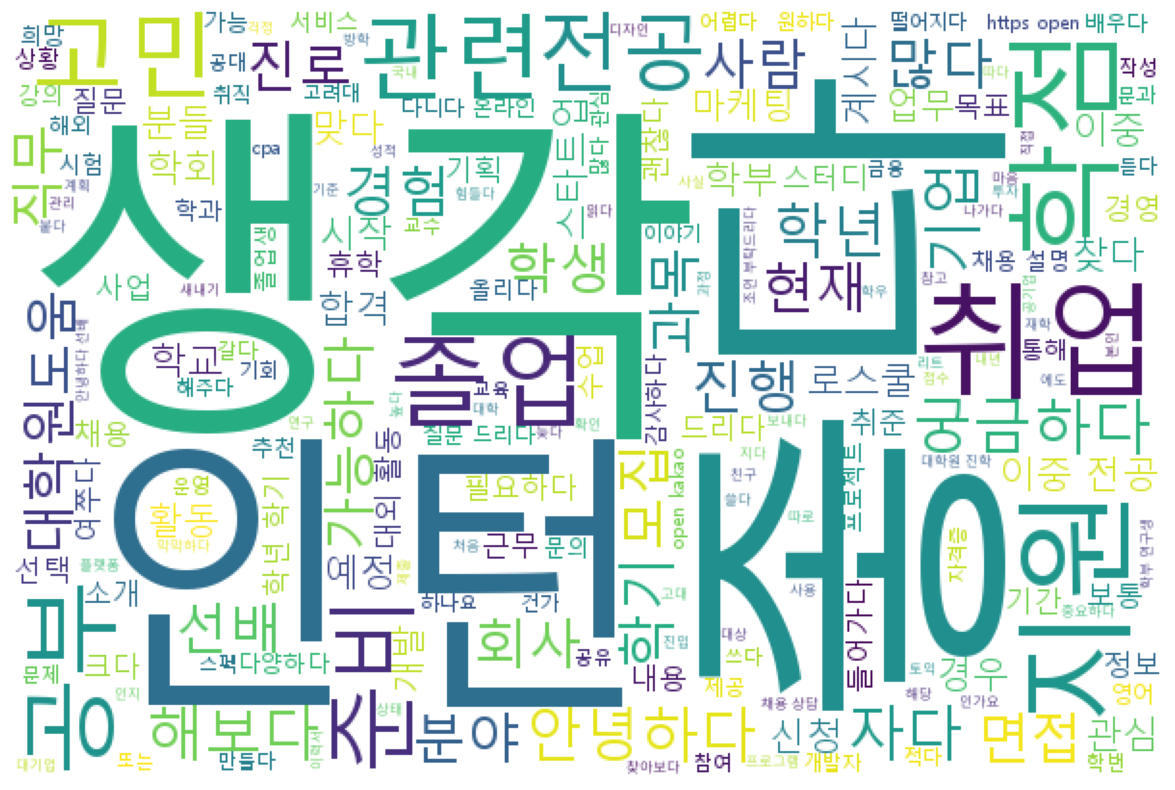

In [336]:
displayWordCloud(data = ' '.join(wordlist), width=600, height=400)

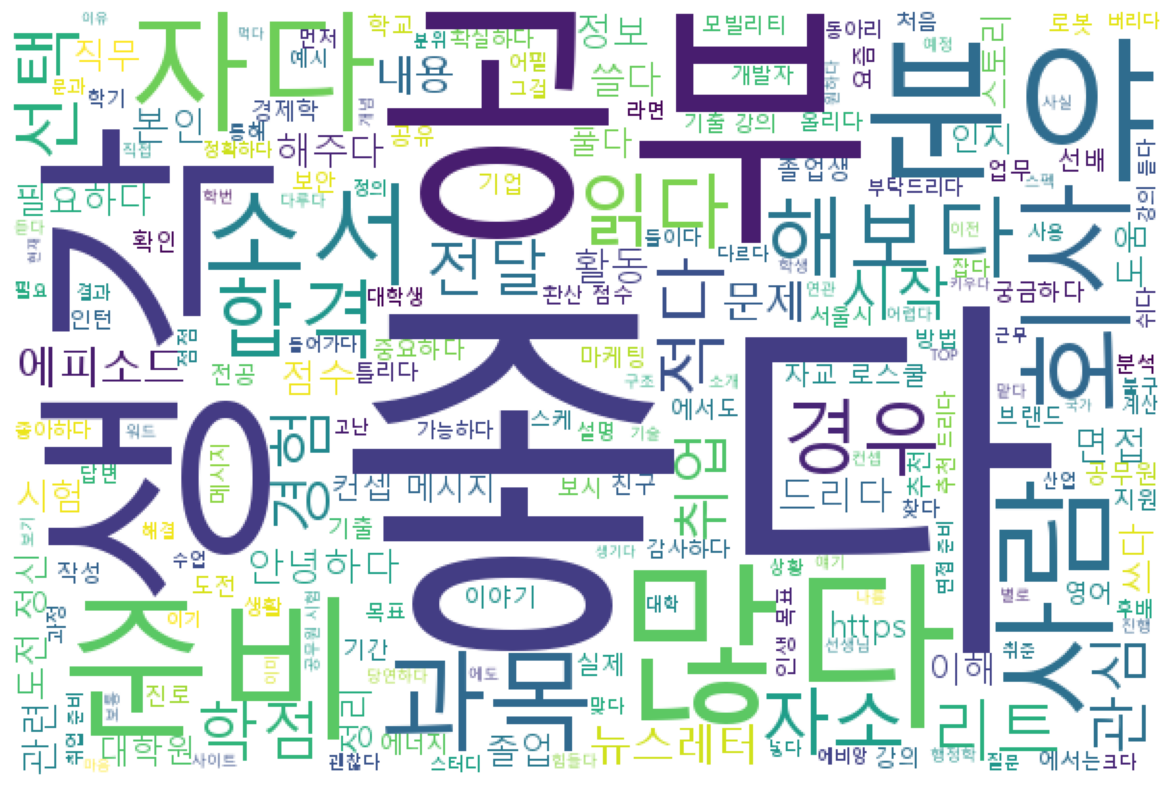

In [362]:
displayWordCloud(data = ' '.join(wordlist_like), width=600, height=400)

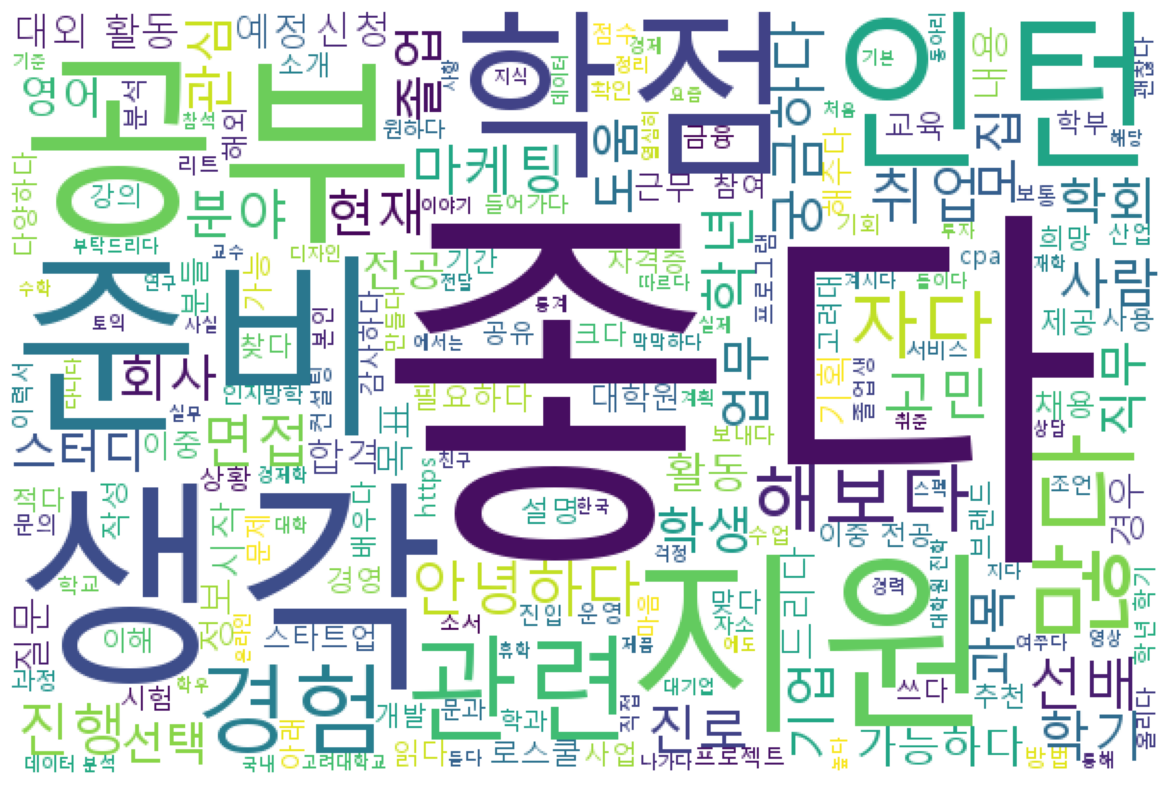

In [363]:
displayWordCloud(data = ' '.join(wordlist_scrap), width=600, height=400)

In [350]:
def vocab_dict(wordlist):
    vocab = []
    length=len(wordlist)
    for i in range(length):
        new_wordlist = wordlist[i].split()        
        for j in new_wordlist:
            vocab.append(j)
    return vocab

In [353]:
all_vocab = vocab_dict(wordlist)

In [354]:
like_vocab = vocab_dict(wordlist_like)

In [355]:
scrap_vocab = vocab_dict(wordlist_scrap)

In [358]:
from collections import Counter
all_freq = Counter(all_vocab)
like_freq = Counter(like_vocab)
scrap_freq = Counter(scrap_vocab)

In [359]:
print(all_freq)

Counter({'지원': 572, '인턴': 543, '준비': 521, '학점': 519, '전공': 504, '생각': 501, '학기': 488, '채용': 484, '좋다': 476, '취업': 440, '학년': 430, '선배': 424, '졸업': 418, '이중': 413, '안녕하다': 408, '관련': 369, '많다': 367, 'https': 347, '모집': 346, '관심': 338, '공부': 337, '해보다': 316, '드리다': 311, '대학원': 307, '진행': 305, '고민': 300, '기업': 296, '궁금하다': 288, '면접': 279, '경험': 278, '부탁드리다': 278, '해주다': 250, '질문': 246, '가능하다': 237, '진로': 237, '00': 234, '자다': 233, '감사하다': 232, '활동': 229, '직무': 224, '스터디': 222, '예정': 220, '현재': 212, '설명': 209, '경영': 206, '학부': 205, '로스쿨': 204, 'com': 203, '분들': 201, '회사': 200, '도움': 199, '학회': 199, '학생': 193, '사람': 189, '분야': 187, '계시다': 182, '개발': 181, '근무': 181, '신청': 177, '맞다': 174, '상담': 171, '업무': 170, '시험': 169, '기간': 164, '내용': 163, '마케팅': 159, '조언': 159, '과목': 156, '합격': 152, '참여': 150, '경우': 146, '시작': 143, '졸업생': 143, '학교': 140, '삼성': 138, '사업': 138, '정보': 137, '휴학': 137, '연락': 135, '아래': 135, '영어': 133, '추천': 131, '기획': 127, '여쭈다': 127, '분석': 126, '스타트업': 125, '듣다': 125, '수업': 1

In [360]:
print(like_freq)

Counter({'좋다': 59, '준비': 54, '공부': 53, '생각': 51, '많다': 45, '분야': 43, '강의': 36, '자다': 36, '소서': 36, '사람': 34, '자소': 34, '점수': 32, '드리다': 31, '회사': 31, '목표': 31, '과목': 31, '면접': 30, '로스쿨': 29, '해보다': 29, '선택': 28, '합격': 28, '취업': 27, '도전': 27, '경우': 27, '기출': 27, '해주다': 26, '읽다': 26, '정리': 25, '문제': 25, '학점': 24, 'https': 24, '메시지': 24, '적다': 24, '내용': 23, '에피소드': 22, '추천': 22, '시험': 22, '경험': 21, '컨셉': 21, '리트': 21, '공무원': 20, '도움': 20, '관심': 19, '전달': 19, '시작': 19, '뉴스레터': 19, '영어': 17, '안녕하다': 17, '본인': 17, '맞다': 17, '활동': 17, '정신': 17, '관련': 17, '정보': 16, '쓰다': 16, '쓸다': 16, '작성': 16, '지원': 16, '업무': 16, '듣다': 16, '졸업': 15, '필요하다': 15, '인생': 15, '마케팅': 15, '이해': 15, '직무': 15, '자교': 15, '진로': 14, '대학원': 14, '생활': 14, '인지': 14, '풀다': 14, '스토리': 14, '계산': 14, '선배': 13, '대학': 13, '졸업생': 13, '실제': 13, '이야기': 13, '라면': 13, '말씀': 13, '00': 13, '게시판': 12, '전공': 12, '요즘': 12, '학교': 12, '기업': 12, '환산': 12, '기술': 12, '해봤다': 12, '보시': 12, '중요하다': 12, '선생님': 12, '공유': 11, '기간': 11, '궁금하다': 11, '버

In [361]:
print(scrap_freq)

Counter({'준비': 194, '좋다': 188, '지원': 183, '생각': 176, '공부': 154, '인턴': 148, '많다': 140, '선배': 135, '학기': 134, '경험': 133, '학년': 131, '학점': 130, '관련': 127, '진행': 121, '해보다': 120, '안녕하다': 119, '활동': 119, '전공': 117, '모집': 114, '취업': 112, '관심': 112, '드리다': 107, '기업': 105, '면접': 105, '이중': 102, '00': 96, '고민': 95, 'https': 95, '자다': 94, '채용': 93, '학회': 93, '진로': 92, '부탁드리다': 91, '업무': 91, '마케팅': 90, '궁금하다': 87, '분야': 87, '해주다': 85, '대학원': 85, '예정': 79, '설명': 78, '근무': 77, '도움': 77, '감사하다': 76, '현재': 75, '질문': 75, '로스쿨': 75, '사람': 75, '스터디': 73, '경영': 72, '목표': 70, '학생': 70, '영어': 70, '졸업': 69, '회사': 68, '내용': 68, '기간': 67, '기획': 67, '분석': 66, '학부': 65, '추천': 64, 'com': 64, '직무': 64, '신청': 63, '시작': 63, '선택': 63, '정보': 62, '대외': 62, '가능하다': 62, '데이터': 62, '시험': 61, '과목': 61, '합격': 60, '문제': 57, '강의': 56, '읽다': 56, '해외': 55, '조언': 55, '분들': 53, '경우': 51, '작성': 50, '교육': 50, '크다': 50, '점수': 50, '산업': 49, '맞다': 49, '필요하다': 47, '사항': 47, '사업': 47, '제공': 45, '과정': 44, '서류': 44, '듣다': 43, '자소': 43, '

In [365]:
!pip install pyLDAvis

     ---------------------------------------- 2.6/2.6 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 10.7/10.7 MB 7.4 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ------------------------------------- 341.8/341.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [366]:
import gensim
from gensim.models import LdaModel
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel

In [408]:
dic = gensim.corpora.Dictionary([all_vocab])
bow_corpus = [dic.doc2bow(doc) for doc in [all_vocab]]

#mallet_path='mallet'
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
#                                             corpus=corpus, 
#                                             num_topics=10, 
#                                             id2word=dic)

NUM_TOPICS=5
lda_model =  gensim.models.LdaModel(bow_corpus, 
                    num_topics = NUM_TOPICS, 
                    id2word = dic)
pyLDAvis.enable_notebook()
#result = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)

In [409]:
result = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
pyLDAvis.display(result)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-19: ordinal not in range(128)

In [407]:
for t in lda_model.show_topics():
    print(t)

(0, '0.008*"준비" + 0.007*"지원" + 0.007*"채용" + 0.006*"학기" + 0.006*"인턴" + 0.006*"학년" + 0.006*"이중" + 0.005*"전공" + 0.005*"드리다" + 0.005*"취업"')
(1, '0.007*"지원" + 0.007*"학점" + 0.007*"채용" + 0.007*"좋다" + 0.006*"안녕하다" + 0.006*"인턴" + 0.006*"준비" + 0.006*"학기" + 0.006*"전공" + 0.006*"선배"')
(2, '0.008*"지원" + 0.008*"준비" + 0.007*"생각" + 0.007*"인턴" + 0.006*"전공" + 0.006*"학년" + 0.006*"졸업" + 0.006*"채용" + 0.005*"좋다" + 0.005*"이중"')
(3, '0.008*"학점" + 0.008*"전공" + 0.007*"생각" + 0.007*"취업" + 0.006*"인턴" + 0.006*"학기" + 0.006*"선배" + 0.005*"학년" + 0.005*"좋다" + 0.005*"이중"')
(4, '0.007*"인턴" + 0.007*"지원" + 0.006*"학점" + 0.006*"좋다" + 0.006*"생각" + 0.006*"학기" + 0.005*"준비" + 0.005*"졸업" + 0.005*"전공" + 0.005*"안녕하다"')


In [393]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

NameError: name 'reload' is not defined

In [ ]:
# 고파스 로그인 하는 과정

driver = webdriver.Chrome(executable_path = "D:/heejun/dev/chromedriver.exe")
driver.implicitly_wait(1)
driver.get('https://www.koreapas.com/bbs/main.php')
driver.find_element(By.NAME,'user_id').send_keys('anthjoon11')
driver.find_element(By.NAME,'password').send_keys('clckflxh00')
login_xpath='/html/body/div/div[5]/div[2]/div/table[2]/tbody/tr/td[2]/form/div/div/input'
driver.find_element(By.XPATH,login_xpath).click()
driver.implicitly_wait(1)

In [ ]:
# 고파스 크롤링
dictionary={} # 크롤링한 text들을 담기 위한 dictionary
page = 0 #페이지 순환을 위한 count num

title_=[]
content_=[] # 글 본문 담을 리스트
comment_=[] # 댓글 담을 리스트
like_=[] # 좋아요 수 담을 리스트
comment_count_=[] # 댓글 수 담을 리스트
scrap_=[] # 스크랩 수 담을 리스트

while True:
    print('page '+str(page))
    
    if page > 0:
        break

    page = page+1
    
    driver.get("https://www.koreapas.com/bbs/zboard.php?id=jobs&page={}&category=&dept=&sn=off&ss=on&sc=on&tagkeyword=&keyword=&sn1=&divpage=83".format(str(page)))
    driver.implicitly_wait(1)

    posts = driver.find_elements(By.CSS_SELECTOR, 'tr.class0')
    links = [post.get_attribute('href') for post in posts]


In [15]:
# 읽은 책 목록 빈도 표시

data = pd.read_excel('읽은책목록.xlsx')

In [16]:
# 결측치 행 제거
data = data.dropna(axis=0)

In [35]:
data

,제목,저자,분야,읽은 년도
0,하얀성,오르한 파묵,문학,2016.0
1,동물농장,조지오웰,문학,2016.0
2,카타리나 블룸의 잃어버린 명예,하인리히 뵐,문학,2016.0
3,위대한 개츠비,스콧 피츠제럴드,문학,2016.0
4,팩트체크,JTBC뉴스룸,언론,2016.0
...,...,...,...,...
115,파이썬 라이브러리를 활용한 머신러닝,안드레아스 뮐러,데이터,2022.0
117,실전 시계열 분석,에일린 닐슨,수학,2023.0
118,calculus essential for statistics,허명회 외 1,수학,2023.0
119,essential of probability for statistics,최태련,수학,2023.0


<AxesSubplot:>

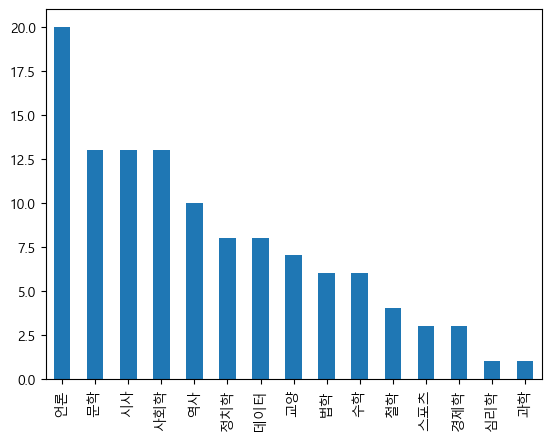

In [63]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

data['분야'].value_counts().plot.bar()

Text(0.5, 1.0, '2016년 읽은 책 항목별 비중')

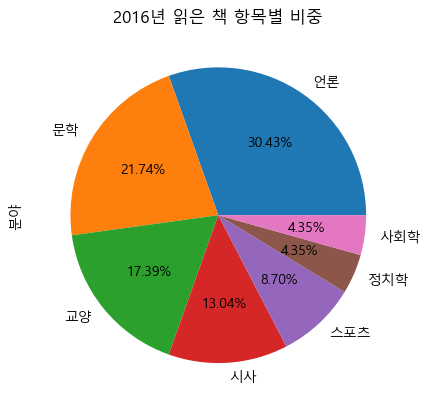

In [53]:
year = data[data['읽은 년도']==2016]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2016년 읽은 책 항목별 비중')

Text(0.5, 1.0, '2017년 읽은 책 항목별 비중')

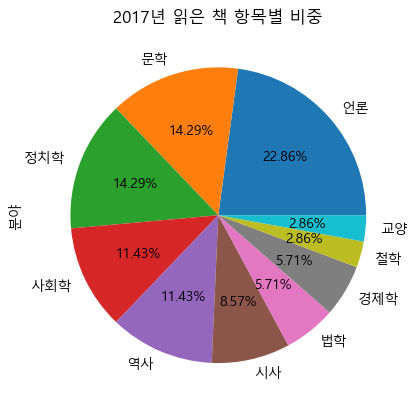

In [54]:
year = data[data['읽은 년도']==2017]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2017년 읽은 책 항목별 비중')

Text(0.5, 1.0, '2018년 읽은 책 항목별 비중')

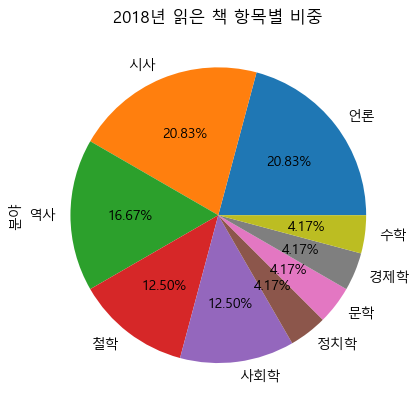

In [55]:
year = data[data['읽은 년도']==2018]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2018년 읽은 책 항목별 비중')

Text(0.5, 1.0, '2019년 읽은 책 항목별 비중')

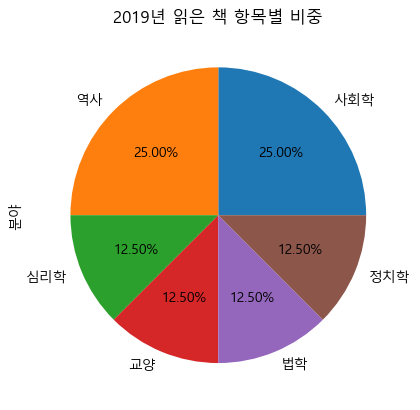

In [58]:
year = data[data['읽은 년도']==2019]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2019년 읽은 책 항목별 비중')

Text(0.5, 1.0, '2020년 읽은 책 항목별 비중')

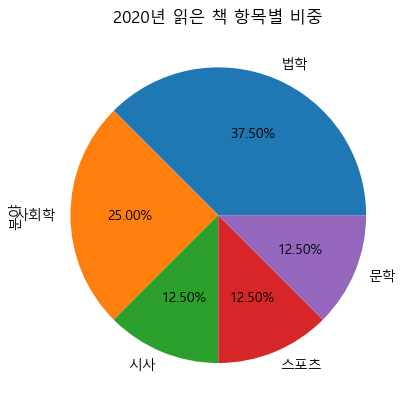

In [57]:
year = data[data['읽은 년도']==2020]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2020년 읽은 책 항목별 비중')

Text(0.5, 1.0, '2021년 읽은 책 항목별 비중')

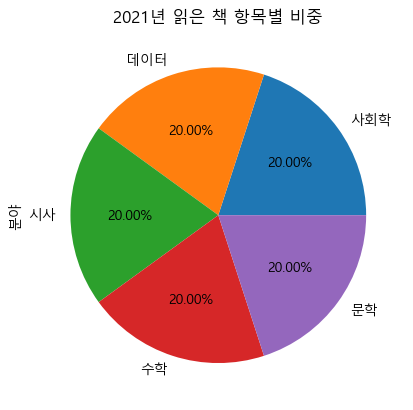

In [59]:
year = data[data['읽은 년도']==2021]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2021년 읽은 책 항목별 비중')

Text(0.5, 1.0, '2022년 읽은 책 항목별 비중')

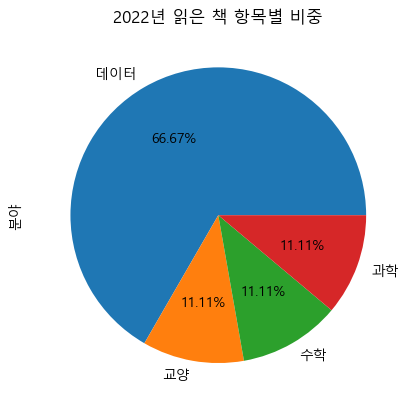

In [60]:
year = data[data['읽은 년도']==2022]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2022년 읽은 책 항목별 비중')

Text(0.5, 1.0, '2023년 읽은 책 항목별 비중')

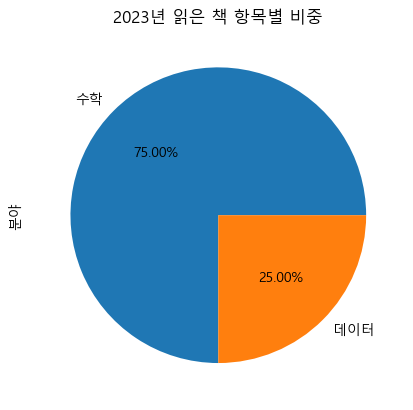

In [61]:
year = data[data['읽은 년도']==2023]
year['분야'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2023년 읽은 책 항목별 비중')

In [64]:
insta = pd.read_excel('팔로워목록.xlsx')

Text(0.5, 1.0, '인스타 팔로잉 항목별 비중')

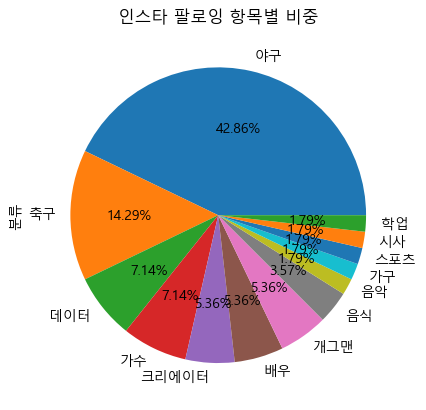

In [67]:
insta['분류'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('인스타 팔로잉 항목별 비중')

Text(0.5, 1.0, '인스타 팔로잉 항목별 빈도수')

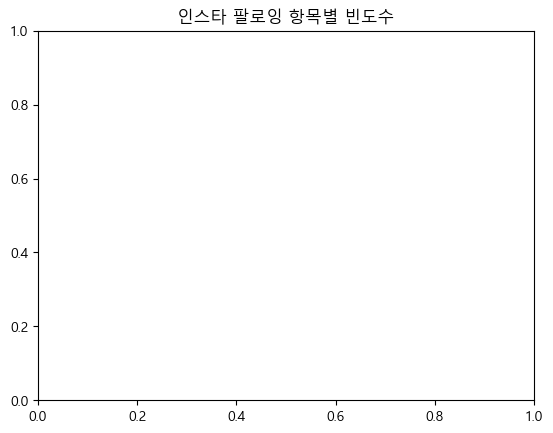

In [70]:
insta['분류'].value_counts().plot.bar
plt.title('인스타 팔로잉 항목별 빈도수')

In [69]:
insta

,계정명,이름,분류
0,harrykane,Harry kane,축구
1,premierleague,Premier League,축구
2,shoheiothani,Shohei Ohtani,야구
3,deep.daive,인공지능/딥러닝 트렌드,데이터
4,hansal___,한살차이,크리에이터
5,pd_jwp,박종욱,음악
6,kubig.offiical,고려대학교 데이터 사이언스 학회:쿠빅,데이터
7,pockets_storage,포케츠,가구
8,sportsjobalio,스포츠잡알리오,스포츠
9,moonbdns,문상훈,크리에이터
